In [9]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_textbook.tools import array_to_latex



# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-06-01 13:30:18,867: Credentials are already in use. The existing account in the session will be replaced.


# Estados de dois qubits

Colocando estado de dois qubits em superposição.

1. Estado inicial:
$$
\vert \psi_0 \rangle = \vert 00 \rangle
$$

2. Aplicar Hadamard em ambos os qubits:

$
\vert \psi_1 \rangle = H^{\otimes^2}\vert 00 \rangle
$

$
\vert \psi_1 \rangle = H\vert 0 \rangle\otimes  H\vert 0 \rangle
$

$
\vert \psi_1 \rangle = \frac{1}{\sqrt{2}}(\vert 0 \rangle + \vert 1 \rangle)\otimes \frac{1}{\sqrt{2}}(\vert 0 \rangle + \vert 1 \rangle)
$

$
\vert \psi_1 \rangle = \displaystyle\frac{1}{2} (\vert 00 \rangle + \vert 01 \rangle + \vert 10 \rangle + \vert 11 \rangle)
$

Outra forma de representar esse estado é:
<center>
$
\vert \psi_1 \rangle = \displaystyle\frac{1}{2} \left[\begin{matrix}\vert 00 \rangle \\ \vert 01 \rangle \\ \vert 10 \rangle \\ \vert 11 \rangle\end{matrix}\right] \equiv \left[\begin{matrix} 1/2 \\ 1/2 \\ 1/2\\ 1/2\end{matrix}\right]
$
</center>

Lembrando que a ordem do qiskit é $\vert q_1q_0\rangle$

<center>
$
\vert \psi_1 \rangle = \displaystyle\frac{1}{2} \left[\begin{matrix}\vert 00 \rangle \\ \vert 10 \rangle \\ \vert 01 \rangle \\ \vert 11 \rangle\end{matrix}\right] \equiv \left[\begin{matrix} 1/2 \\ 1/2 \\ 1/2\\ 1/2\end{matrix}\right]
$
</center>


## **Cada estado tem a mesma probabilidade de ser medido** 

$$p(\vert q_i,q_j\rangle) = \displaystyle \left(\frac{1}{2}\right)^2 = 0.25$$

 
**<center>A mecânica quântica é uma TEORIA PROBABILÍSTICA</center>**






1. Construindo nosso circuito - superposição estados de dois qubits. Abaixo mostramos a visualização desse estado usando qiskit

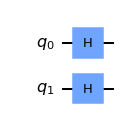

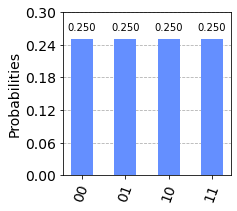

<IPython.core.display.Math object>

In [10]:
n = 2
qc = QuantumCircuit(n)
qc.h(0)
qc.h(1)
display(qc.draw())
'''

Executando o circuito acima em um simulador quântico. 
O resultado irá mostrar a probabilidade de obter um dos 4 estados possivíveis:

00, 01, 10 e 11

Lembrando que o que conseguimos estrair de informação são os bits clássicos.

'''
backend = Aer.get_backend('statevector_simulator')
results = execute(qc,backend).result().get_counts()
state = execute(qc,backend).result().get_statevector()

#Gerando o histograma dos resultatos
display(plot_histogram(results, figsize = (3,3)))

#Mostrando vetor de estado

array_to_latex(state, pretext="\\vert \psi\\rangle = ")

Como podemos ver acima todas as possibilidades $\{\vert 00\rangle, \vert 01 \rangle, \vert 10\rangle$ e $\vert 11\rangle\}$ aparecem com igual probabilidade.

### <center>O que isso significa?</center>

<center>1/4 das vezes vamos obter o resultado 00<center>
<center>1/4 das vezes vamos obter o resultado 01<center>
<center>1/4 das vezes vamos obter o resultado 10<center>
<center>1/4 das vezes vamos obter o resultado 11<center>

# Medição -  verificando probabilidades

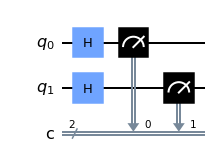

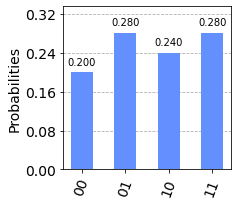

O resultado 00 apareceu 20
O resultado 01 apareceu 28
O resultado 10 apareceu 24
O resultado 11 apareceu 28


In [20]:
n = 2 # número de qubits
c = 2 # número de bits (clássicos) 

#iniciando o circuito com n qubit e c bits
qc = QuantumCircuit(n, c)
qc.h(0)
qc.h(1)

#medindo os qubits q0 e q1 e guarando o valor em c0 e c1 (respectivamente)
qc.measure(range(n), range(c))
display(qc.draw())

shots = 100 #quantidade de vezes que realizamos o experimento
plots = 1 #numero de plots
backend = Aer.get_backend('qasm_simulator')

for i in range(plots):
    results = execute(qc,backend, shots = shots).result().get_counts()
    #Gerando o histograma dos resultatos
    display(plot_histogram(results, figsize = (3,3)))
print(f"O resultado 00 apareceu {results['00']}")
print(f"O resultado 01 apareceu {results['01']}")
print(f"O resultado 10 apareceu {results['10']}")
print(f"O resultado 11 apareceu {results['11']}")

# <center>Emaranhamento -  Estados de Bell</center>

Quatro possibilidades de estados de Bell (estados emaranhados de dois qubits)
<center>1. $\vert \psi_1 \rangle = \displaystyle\frac{1}{\sqrt{2}} (\vert 00 \rangle + \vert 11 \rangle)$</center>
<center>2. $\vert \psi_2 \rangle = \displaystyle\frac{1}{\sqrt{2}} (\vert 00 \rangle - \vert 11 \rangle)$</center>
<center>2. $\vert \psi_3 \rangle = \displaystyle\frac{1}{\sqrt{2}} (\vert 01 \rangle + \vert 10 \rangle)$</center>
<center>2. $\vert \psi_4 \rangle = \displaystyle\frac{1}{\sqrt{2}} (\vert 01 \rangle - \vert 10 \rangle)$</center>

Construindo o estado:
<center>$\vert \psi_1 \rangle = \displaystyle\frac{1}{\sqrt{2}} (\vert 00 \rangle + \vert 11 \rangle)$</center>



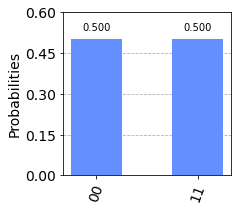

<IPython.core.display.Math object>

In [12]:
n = 2 # número de qubits
c = 2 # número de bits (clássicos) 

#iniciando o circuito com n qubit e c bits
qc = QuantumCircuit(n)
qc.h(0)
qc.cx(0,1)
qc.draw()

backend = Aer.get_backend('statevector_simulator')
results = execute(qc,backend).result().get_counts()
display(plot_histogram(results, figsize = (3,3)))
state = execute(qc,backend).result().get_statevector()


array_to_latex(state, pretext="\\vert \psi \\rangle = ")



Construindo o estado:
<center>$\vert \psi_1 \rangle = \displaystyle\frac{1}{\sqrt{2}} (\vert 00 \rangle - \vert 11 \rangle)$</center>



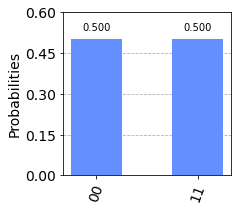

<IPython.core.display.Math object>

In [18]:
n = 2 # número de qubits
c = 2 # número de bits (clássicos) 

#iniciando o circuito com n qubit e c bits
qc = QuantumCircuit(n)
# qc.h(0)
# qc.z(0)
qc.x(0)
qc.h(0)
qc.cx(0,1)
qc.draw()

backend = Aer.get_backend('statevector_simulator')
results = execute(qc,backend).result().get_counts()
display(plot_histogram(results, figsize = (3,3)))
state = execute(qc,backend).result().get_statevector()


array_to_latex(state, pretext="\\vert \psi \\rangle = ")

Construindo o estado:
<center>$\vert \psi_3 \rangle = \displaystyle\frac{1}{\sqrt{2}} (\vert 01 \rangle + \vert 10 \rangle)$</center>



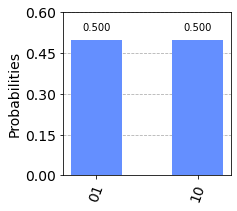

<IPython.core.display.Math object>

In [15]:
n = 2 # número de qubits
c = 2 # número de bits (clássicos) 

#iniciando o circuito com n qubit e c bits
qc = QuantumCircuit(n)
qc.h(0)  #00 + 10
qc.x(1) #01 + 11 (0 + 1)* 1
qc.cx(0,1) #01 +10 (?)
qc.draw()

backend = Aer.get_backend('statevector_simulator')
results = execute(qc,backend).result().get_counts()
display(plot_histogram(results, figsize = (3,3)))
state = execute(qc,backend).result().get_statevector()


array_to_latex(state, pretext="\\vert \psi \\rangle = ")

Construindo o estado:
<center>$\vert \psi_4 \rangle = \displaystyle\frac{1}{\sqrt{2}} (\vert 01 \rangle - \vert 10 \rangle)$</center>



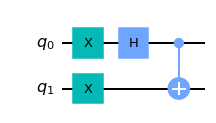

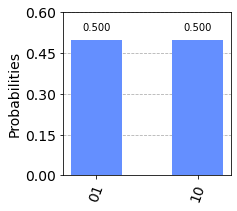

<IPython.core.display.Math object>

In [16]:
n = 2 # número de qubits
c = 2 # número de bits (clássicos) 

#iniciando o circuito com n qubit e c bits
qc = QuantumCircuit(n)
qc.x(0)
qc.h(0)
qc.x(1)
qc.cx(0,1)
display(qc.draw())

backend = Aer.get_backend('statevector_simulator')
results = execute(qc,backend).result().get_counts()
display(plot_histogram(results, figsize = (3,3)))
state = execute(qc,backend).result().get_statevector()


array_to_latex(state, pretext="\\vert \psi \\rangle = ")

Estados Emaranhados como recurso de informação